In [1]:
import numpy as np

# Define the list of 2x2 matrices
matrices = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]

# Define the scalar value A*E/L
scalar = 2.5

# Multiply the scalar value to each matrix in the list
results = [scalar * matrix for matrix in matrices]

# Print the results
for result in results:
    print(result)


[[ 2.5  5. ]
 [ 7.5 10. ]]
[[12.5 15. ]
 [17.5 20. ]]


In [2]:
import numpy as np

# Define the list of 2x2 matrices
matrices = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]

# Define the scalar value A*E/L
scalar = 2.5

# Multiply the scalar value to each matrix in the list
results = [scalar * matrix for matrix in matrices]

# Print the results in Python syntax format
for result in results:
    print(np.array2string(result, separator=', ', formatter={'int': lambda x: str(x)}))


[[ 2.5,  5. ],
 [ 7.5, 10. ]]
[[12.5, 15. ],
 [17.5, 20. ]]


In [3]:
import numpy as np

# Define the list of 2x2 matrices
matrices = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]

# Define the scalar value A*E/L
scalar = 2.5

# Multiply the scalar value to each matrix in the list
results = [scalar * matrix for matrix in matrices]

# Save the results as a NumPy array in a .npy file
np.save('results.npy', results)


In [7]:
scalar*results

array([[[ 6.25, 12.5 ],
        [18.75, 25.  ]],

       [[31.25, 37.5 ],
        [43.75, 50.  ]]])

In [4]:
import numpy as np

# Load the results from the .npy file
results = np.load('results.npy')

# Print the results
print(results)


[[[ 2.5  5. ]
  [ 7.5 10. ]]

 [[12.5 15. ]
  [17.5 20. ]]]


In [8]:
import pickle
import numpy as np

# Define the list of 2x2 matrices
matrices = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]

# Define the scalar value A*E/L
scalar = 2.5

# Multiply the scalar value to each matrix in the list
results = [scalar * matrix for matrix in matrices]

# Save the results as a list of NumPy arrays in a file using pickle
with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)

# Load the results from the file
with open('results.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Print the loaded results
print(loaded_results)


[array([[ 2.5,  5. ],
       [ 7.5, 10. ]]), array([[12.5, 15. ],
       [17.5, 20. ]])]


In [ ]:
import numpy as np

# Define the list of 2x2 matrices
matrices = [np.array([[ 2.5,  5. ], [ 7.5, 10. ]]), np.array([[12.5, 15. ], [17.5, 20. ]])]

# Define the scalar value A*E/L
scalar = 2.5

# Multiply the scalar value to each matrix in the list
results = [scalar * matrix for matrix in matrices]

# Convert the results to a string representation
results_str = np.array2string(np.array(results), separator=',', prefix='[').replace('\n', '')

# Save the results to a text file
with open('results.txt', 'w') as f:
    f.write(results_str)

# Load the results from the text file
with open('results.txt', 'r') as f:
    loaded_results_str = f.read()

# Convert the loaded results to a list of NumPy arrays
loaded_results = eval(loaded_results_str)

# Print the loaded results
print(loaded_results)


In [ ]:
#for bar element A*E/L for a unifor bar with same area 
#the load can be considered at nodes at its ends or choose correct discretisation 
#for Frustrum based one use different areas A
#and for different matrial and length of varios bar element use different length as L1,L2,l3
#for different Area use A1,A2,A3 and so on E1,E2,E3 for avrious material youngs modulus
# create the list of matrices and multiply it according to it

In [ ]:
#for Frustrum based bar one use different areas A with load at end
#if its sepearted into diffent areas A2=(((A1)-(A1-A4))*x)/(L)
#x is the distance between two nodes

In [ ]:
import numpy as np

# Define the material properties
E = 200e9  # Young's modulus in Pa
A = 0.01  # cross-sectional area in m^2
L = 5  # length in m

# Define the element stiffness matrix
k = np.array([
    [1, -1],
    [-1, 1]
]) * (E * A / L)

print("Element stiffness matrix:")
print(k)


In [ ]:
import numpy as np

# Define the material properties
E = 200e9  # Young's modulus in Pa
A = 0.01  # cross-sectional area in m^2
L = 5  # length in m

# Define the element stiffness matrix
k = np.array([
    [1, -1],
    [-1, 1]
]) * (E * A / L)

print("Element stiffness matrix:")
print(k)

In [10]:
import numpy as np

# Define the material properties
E = 200e9  # Young's modulus in Pa
A = 0.01  # cross-sectional area in m^2
L = 5  # length in m

# Define the nodal connectivity
node1 = 1
node2 = 2

# Calculate the direction cosines
theta = np.pi / 4  # angle in radians
l1 = np.cos(theta)
m1 = np.sin(theta)

# Calculate the element stiffness matrix
k_element = np.array([
    [l1**2, l1*m1, -l1**2, -l1*m1],
    [l1*m1, m1**2, -l1*m1, -m1**2],
    [-l1**2, -l1*m1, l1**2, l1*m1],
    [-l1*m1, -m1**2, l1*m1, m1**2]
]) * (E * A / L)

# Assemble the element stiffness matrix into the global stiffness matrix
k_global = np.zeros((4, 4))
k_global[node1-1:node1+1, node1-1:node1+1] += k_element[:2, :2]
k_global[node1-1:node1+1, node2-1:node2+1] += k_element[:2, 2:]
k_global[node2-1:node2+1, node1-1:node1+1] += k_element[2:, :2]
k_global[node2-1:node2+1, node2-1:node2+1] += k_element[2:, 2:]

print("Global stiffness matrix:")
print(k_element)
print(k_global)


Global stiffness matrix:
[[ 2.e+08  2.e+08 -2.e+08 -2.e+08]
 [ 2.e+08  2.e+08 -2.e+08 -2.e+08]
 [-2.e+08 -2.e+08  2.e+08  2.e+08]
 [-2.e+08 -2.e+08  2.e+08  2.e+08]]
[[ 2.00000000e+08 -2.98023224e-08 -2.00000000e+08  0.00000000e+00]
 [-2.98023224e-08  0.00000000e+00  2.98023224e-08  0.00000000e+00]
 [-2.00000000e+08  2.98023224e-08  2.00000000e+08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [12]:
import numpy as np

# Define the material properties
E = 200e9  # Young's modulus in Pa
I = 0.0001  # moment of inertia in m^4
L = 5  # length in m

# Define the nodal connectivity
node1 = 1
node2 = 2

# Define the loads at each node
F = np.array([0, -10000, 0, 0])  # force vector in N
M = np.array([0, 0, 0, 0])  # moment vector in N*m

# Calculate the element stiffness matrix for bending and axial loads
k_element = np.array([
    [12, 6*L, -12, 6*L],
    [6*L, 4*L**2, -6*L, 2*L**2],
    [-12, -6*L, 12, -6*L],
    [6*L, 2*L**2, -6*L, 4*L**2]
]) * (E * I / L**3)

# Add the contribution of the force and moment loads
k_element[:2, :2] += (F[:2, np.newaxis] @ F[:2, np.newaxis].T) / np.abs(F[1])
k_element[:2, 2:] -= (F[:2, np.newaxis] @ F[2:, np.newaxis].T) / np.abs(F[1])
k_element[2:, :2] -= (F[2:, np.newaxis] @ F[:2, np.newaxis].T) / np.abs(F[1])
k_element[2:, 2:] += (F[2:, np.newaxis] @ F[2:, np.newaxis].T) / np.abs(F[1])
k_element[:2, 2:] -= (M[:2, np.newaxis] @ np.array([1, -1])[np.newaxis, :])
k_element[2:, :2] += (M[:2, np.newaxis] @ np.array([1, -1])[np.newaxis, :])
k_element[2:, 2:] += (M[2:, np.newaxis] @ np.array([L, -L])[np.newaxis, :])

# Assemble the element stiffness matrix into the global stiffness matrix
k_global = np.zeros((4, 4))
k_global[node1-1:node1+1, node1-1:node1+1] += k_element[:2, :2]
k_global[node1-1:node1+1, node2-1:node2+1] += k_element[:2, 2:]
k_global[node2-1:node2+1, node1-1:node1+1] += k_element[2:, :2]
k_global[node2-1:node2+1, node2-1:node2+1] += k_element[2:, 2:]

print(k_element )

[[ 1920000.  4800000. -1920000.  4800000.]
 [ 4800000. 16010000. -4800000.  8000000.]
 [-1920000. -4800000.  1920000. -4800000.]
 [ 4800000.  8000000. -4800000. 16000000.]]


In [18]:
import numpy as np

# Define the coordinates of the triangle
x1, y1 = 100, 100
x2, y2 = 400, 100
x3, y3 = 200, 400

# Define the element length
#L = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calculate the coefficients for the shape functions
#a = np.array([
 #   [1, x1, y1],
   # [1, x2, y2],
  #  [1, x3, y3]
#])
#b = np.array([1, 0, 0])
#c = np.linalg.solve(a, b)

# Define the derivatives of the shape functions with respect to global coordinates
dN1_dx =  (y2 - y3)
dN2_dx =  (y3 - y1)
dN3_dx =  (y1 - y2)
dN1_dy = (x3 - x2)
dN2_dy = (x1 - x3)
dN3_dy =  (x2 - x1)

# Construct the strain-displacement matrix [B]
B = np.array([
    [dN1_dx, 0, dN2_dx, 0, dN3_dx, 0],
    [0, dN1_dy, 0, dN2_dy, 0, dN3_dy],
    [dN1_dy, dN1_dx, dN2_dy, dN2_dx, dN3_dy, dN3_dx]
]) 
B = np.array([
    [dN1_dx, 0, dN2_dx, 0, dN3_dx, 0],
    [0, dN1_dy, 0, dN2_dy, 0, dN3_dy],
    [dN1_dy, dN1_dx, dN2_dy, dN2_dx, dN3_dy, dN3_dx]
])
B_transpose = np.transpose(B)
print(B_transpose)

print(B_transpose)
print(B)


[[-300    0 -200]
 [   0 -200 -300]
 [ 300    0 -100]
 [   0 -100  300]
 [   0    0  300]
 [   0  300    0]]
[[-300    0 -200]
 [   0 -200 -300]
 [ 300    0 -100]
 [   0 -100  300]
 [   0    0  300]
 [   0  300    0]]
[[-300    0  300    0    0    0]
 [   0 -200    0 -100    0  300]
 [-200 -300 -100  300  300    0]]


[[ 3.20879121e+16  1.85714286e+16 -2.05494505e+16 -8.02197802e+15
  -1.15384615e+16 -1.05494505e+16]
 [ 1.85714286e+16  2.49450549e+16 -7.03296703e+15 -4.83516484e+15
  -1.15384615e+16 -2.01098901e+16]
 [-2.05494505e+16 -7.03296703e+15  1.59340659e+16  3.40659341e+15
   4.61538462e+15  3.62637363e+15]
 [-8.02197802e+15 -4.83516484e+15  3.40659341e+15  4.50549451e+15
   4.61538462e+15  3.29670330e+14]
 [-1.15384615e+16 -1.15384615e+16  4.61538462e+15  4.61538462e+15
   6.92307692e+15  6.92307692e+15]
 [-1.05494505e+16 -2.01098901e+16  3.62637363e+15  3.29670330e+14
   6.92307692e+15  1.97802198e+16]]


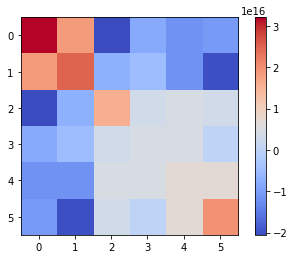

In [23]:
#use 1/2*A in B matrix 

import numpy as np

# Define the Young's modulus and Poisson's ratio
E = 200e9 # Pa
nu = 0.3

# Calculate the shear modulus
G = E / (2 * (1 + nu))

# Construct the [D] matrix
D = np.array([
    [1, nu, 0],
    [nu, 1, 0],
    [0, 0, (1 - nu) / 2]
]) * (E / (1 - nu**2))

# Add in the shear terms
D[0, 2] = D[2, 0] = D[1, 2] = D[2, 1] = G

#print(D)
result =  B_transpose.dot(D).dot(B)
print(result)

import numpy as np
import matplotlib.pyplot as plt

# Define a matrix
matrix =B_transpose.dot(D).dot(B)

# Plot the matrix
plt.imshow(matrix, cmap='coolwarm')
plt.colorbar()

# Show the plot
plt.show()


In [ ]:
import numpy as np

# Define the matrix a
a = np.array([
    [1, x1, y1],
    [1, x2, y2],
    [1, x3, y3]
]) * (1/2)

# Calculate the determinant of a
det_a = np.linalg.det(a)

# Print the determinant
print(det_a)


In [ ]:
import numpy as np

# Define the coordinates of the triangle
x1, y1 = 100, 100
x2, y2 = 400, 100
x3, y3 = 200, 400

# Define the radius at the centroid of the triangle
r = (x1 + x2 + x3) / 3

# Calculate the coefficients for the shape functions
A = np.array([
    [1, x1, y1, x1**2 + y1**2],
    [1, x2, y2, x2**2 + y2**2],
    [1, x3, y3, x3**2 + y3**2]
])
b = np.array([1, 0, 0])
c = np.linalg.solve(A, b)

# Define the derivatives of the shape functions with respect to global coordinates
dN1_dx =  (y2 - y3) / (2 * r)
dN2_dx =  (y3 - y1) / (2 * r)
dN3_dx =  (y1 - y2) / (2 * r)
dN1_dy = (x3 - x2) / (2 * r)
dN2_dy = (x1 - x3) / (2 * r)
dN3_dy =  (x2 - x1) / (2 * r)
dN1_dw = r / 2
dN2_dw = r / 2
dN3_dw = r / 2

# Construct the strain-displacement matrix [B]
B = np.array([
    [dN1_dx, 0, dN2_dx, 0, dN3_dx, 0],
    [0, dN1_dy, 0, dN2_dy, 0, dN3_dy],
    [dN1_dw, 0, dN2_dw, 0, dN3_dw, 0],
    [0, dN1_dx, 0, dN2_dx, 0, dN3_dx],
    [dN1_dy, dN1_dx, dN2_dy, dN2_dx, dN3_dy, dN3_dx]
]) 
B_transpose = np.transpose(B)
print(B_transpose)

print(B)


In [ ]:
nu = 0.3  # Poisson's ratio
E = 210e9  # Young's modulus

# Calculate the Lame constants
mu = E / (2 * (1 + nu))
lam = E * nu / ((1 + nu) * (1 - 2 * nu))

# Create the [D] matrix
D = np.array([
    [lam + 2 * mu, lam, lam, 0],
    [lam, lam + 2 * mu, lam, 0],
    [lam, lam, lam + 2 * mu, 0],
    [0, 0, 0, mu]
])
